*Six young health participants were asked to perform one set of 10 repetitions of the Unilateral Dumbbell Biceps Curl in five different fashions:
* exactly according to the specification (Class A)
* throwing the elbows to the front (Class B)
* lifting the dumbbell only halfway (Class C)
* lowering the dumbbell only halfway (Class D)
* throwing the hips to the front (Class E)

# Assignment:
The goal of this project is to predict the manner in which they did the exercise. This is the “classe” variable in the training set. In the next sections We will show how a model was buily, what variables we selected and why in order to build our model and run the predictions. We will also cover the topics of cross validation, what is our estimate of the expected out of sample error. Finally, our prediction model will be used to predict 20 different test cases.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as p
import numpy as n

In [2]:
pml_train=pd.read_csv("pml-training.csv")
p_test=pd.read_csv("pml-testing.csv")

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pml_train.head(10)
p_test.head(10)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
0,1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
1,2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
2,3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
3,4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
4,5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
5,6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,...,-0.88,4.26,1.35,230,322,-144,-300,800,884,6
6,7,jeremy,1322673128,766645,30/11/2011 17:12,no,485,1.20,4.44,-87.30,...,-0.53,1.80,0.75,-192,170,-175,-678,284,585,7
7,8,jeremy,1322673076,54671,30/11/2011 17:11,no,440,0.43,4.15,-88.50,...,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32,8
8,9,carlitos,1323084240,916313,05/12/2011 11:24,no,323,0.93,6.72,-93.70,...,0.03,0.02,-0.02,195,204,-217,0,652,469,9
9,10,charles,1322837822,384285,02/12/2011 14:57,no,664,114.00,22.40,-13.10,...,0.02,0.13,-0.07,-212,98,-7,-403,723,512,10


In [4]:
pml_test=pd.read_csv("pml-testing.csv")

In [5]:
p0=pml_train.dropna(axis=1)
p_test_2=p_test.dropna(axis=1)

In [6]:
p0

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,19618,adelmo,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,19619,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,19620,adelmo,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.50,130.0,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,19621,adelmo,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.90,131.0,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


In [7]:
p1=p0.drop(p0.columns[[0,0]],axis=1)
p_test_3=p_test_2.drop(p_test_2.columns[[0,0]],axis=1)

In [8]:
p1.drop("user_name",axis=1,inplace=True)
p_test_3.drop("user_name",axis=1,inplace=True)

In [9]:
p1

,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.00,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,0.02,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,0.00,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,0.02,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,0.02,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,21,0.37,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,19,0.39,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.50,130.0,19,0.37,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.90,131.0,18,0.37,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


In [10]:
p1["classe"].value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

In [11]:
def swap1(a):
    temp=a[2]
    a[2]=a[4]
    a[4]=temp
    return a
def swap2(b):
    temp=b[2]
    b[2]=b[3]
    b[2]=temp
    return b

In [12]:
vc=p1["classe"].value_counts()
vc=swap1(vc)
vc=swap2(vc)
vc.index=["A","B","C","D","E"]
print(vc)

A    5580
B    3797
C    3216
D    3422
E    3607
Name: classe, dtype: int64


In [13]:
vc.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [14]:
vc.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

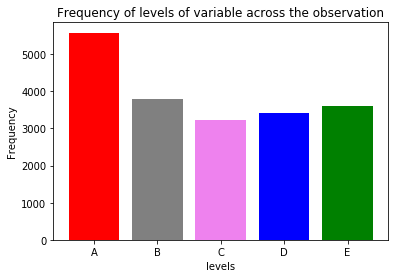

In [15]:
fig,ax=p.subplots()
ax.bar(vc.index,vc,color=["red","gray","violet","blue","green"]);
ax.set(title="Frequency of levels of variable across the observation",xlabel="levels",ylabel="Frequency" );

In [16]:
type(vc)

pandas.core.series.Series

In [17]:
vc.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [18]:
p1.to_csv("p1.csv",index=False)

In [19]:
p2=pd.read_csv("p1.csv")

In [20]:
p2.drop(["raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window"],inplace=True,axis=1)

In [21]:
p2

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,147.00,-34.80,129.0,21,0.37,-0.02,-0.67,50,26,-193,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,145.00,-35.30,130.0,19,0.39,-0.02,-0.67,47,15,-179,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,145.00,-35.50,130.0,19,0.37,0.00,-0.64,47,13,-177,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,143.00,-35.90,131.0,18,0.37,-0.02,-0.59,46,18,-172,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


In [22]:
p_test=pd.read_csv("pml-testing.csv")
p_test.head(10)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
0,1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
1,2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
2,3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
3,4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
4,5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
5,6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,...,-0.88,4.26,1.35,230,322,-144,-300,800,884,6
6,7,jeremy,1322673128,766645,30/11/2011 17:12,no,485,1.20,4.44,-87.30,...,-0.53,1.80,0.75,-192,170,-175,-678,284,585,7
7,8,jeremy,1322673076,54671,30/11/2011 17:11,no,440,0.43,4.15,-88.50,...,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32,8
8,9,carlitos,1323084240,916313,05/12/2011 11:24,no,323,0.93,6.72,-93.70,...,0.03,0.02,-0.02,195,204,-217,0,652,469,9
9,10,charles,1322837822,384285,02/12/2011 14:57,no,664,114.00,22.40,-13.10,...,0.02,0.13,-0.07,-212,98,-7,-403,723,512,10


In [23]:
from sklearn import tree
n.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
x=p2.drop("classe",axis=1)
y=p2["classe"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [219]:
n.random.seed(2007)
clf=tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

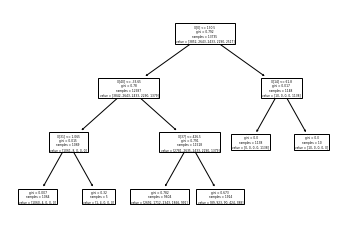

In [220]:
tree.plot_tree(clf);

In [34]:
y_predict=clf.predict(x_test)
ypredict_proba=clf.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score,roc_curve,cohen_kappa_score,mean_squared_error
y_conf_matrix=confusion_matrix(y_test,y_predict)#Confusion Matrix
#tres,tpre,fpre=roc_auc_score(y_test,y_predict)
cks=cohen_kappa_score(y_test,y_predict)

In [36]:
conf=pd.DataFrame(y_conf_matrix,index=["A","B","C","D","E"],columns=["A","B","C","D","E"])
print("Confusion Matrix:")
print(conf)
print(f"Kappa:{cks}")
print(f"Accuracy :{accuracy_score(y_test,y_predict)}")
print(f"Balanced Accuracy:{balanced_accuracy_score(y_test,y_predict,adjusted=True)}")
print(f"Mcnemar's Test P-Value : NA")


Confusion Matrix:
      A     B    C    D     E
A  1688    20   12    4     4
B    29  1069   28    7    21
C     7    22  935   20     5
D     5    12   30  866    13
E     2    15   17    9  1047
Kappa:0.9392215902632061
Accuracy :0.9520978427042637
Balanced Accuracy:0.9360875104313634
Mcnemar's Test P-Value : NA


In [37]:
from sklearn.metrics import classification_report
a=classification_report(y_test,y_predict,output_dict=True)

In [38]:
pd.DataFrame(a)

,A,B,C,D,E,accuracy,macro avg,weighted avg
precision,0.975159,0.939367,0.914873,0.955850,0.96055,0.952098,0.949160,0.952273
recall,0.976852,0.926343,0.945399,0.935205,0.96055,0.952098,0.948870,0.952098
f1-score,0.976005,0.932810,0.929886,0.945415,0.96055,0.952098,0.948933,0.952116
support,1728.000000,1154.000000,989.000000,926.000000,1090.00000,0.952098,5887.000000,5887.000000


In [114]:
p_test_3.drop(["raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window"],inplace=True,axis=1)

In [ ]:
x_t=p_test_3

In [112]:
x_t.drop("problem_id",axis=1,inplace=True)

In [41]:
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor
x=p2.drop("classe",axis=1)
y=p2["classe"]
n.random.seed(2007)
clf=tree.DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
c=clf.predict(x_t)

In [43]:
j=x_t.columns

In [44]:
xo=pd.DataFrame({"Prediction":c})

In [45]:
def function(c):
    f=open("Prediction Table.txt","w")
    f.write(tabulate(xo))
    f.close()   

In [46]:
xo

,Prediction
0,B
1,A
2,B
3,A
4,A
5,E
6,D
7,B
8,A
9,A


The final Prediction:
B  A  B  A  A  E  D  B  A  A  B  C  B  A  E  E  A  B  B  B 

# RandomForest

In [47]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.DataFrame()

data =x
data['classe']=y

enc = LabelEncoder()

print(data)
enc.fit(data['classe'])
data['classe'] = enc.transform(data['classe'])
print(data)

       roll_belt  pitch_belt  yaw_belt  total_accel_belt  gyros_belt_x  \
0           1.41        8.07     -94.4                 3          0.00   
1           1.41        8.07     -94.4                 3          0.02   
2           1.42        8.07     -94.4                 3          0.00   
3           1.48        8.05     -94.4                 3          0.02   
4           1.48        8.07     -94.4                 3          0.02   
...          ...         ...       ...               ...           ...   
19617     147.00      -34.80     129.0                21          0.37   
19618     145.00      -35.30     130.0                19          0.39   
19619     145.00      -35.50     130.0                19          0.37   
19620     143.00      -35.90     131.0                18          0.37   
19621     143.00      -36.00     132.0                18          0.35   

       gyros_belt_y  gyros_belt_z  accel_belt_x  accel_belt_y  accel_belt_z  \
0              0.00         -0.0

In [48]:
from sklearn import tree
n.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
X=data.drop("classe",axis=1)
Y=data["classe"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
n.random.seed(2007)
clf2=tree.DecisionTreeClassifier()
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
clf2.predict(X_test)

array([1, 2, 4, ..., 1, 0, 2])

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()
clf3.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
eo=clf3.predict(X_test)

In [52]:
eo,y_predict

(array([1, 2, 4, ..., 1, 2, 3]),
 array(['B', 'C', 'E', ..., 'B', 'A', 'C'], dtype=object))

In [53]:
con=confusion_matrix(Y_test,eo)

In [54]:
con

array([[1727,    0,    1,    0,    0],
       [   1, 1152,    1,    0,    0],
       [   0,    5,  984,    0,    0],
       [   0,    0,    5,  918,    3],
       [   0,    0,    0,    1, 1089]], dtype=int64)

In [55]:
#Accuracy
print(f"accuracy score:{accuracy_score(Y_test,eo)}")

accuracy score:0.9971122812977747


In [56]:
#banlanced score
print(f"balanced accuracy: {balanced_accuracy_score(Y_test,eo)}")


balanced accuracy: 0.9966151684532584


In [57]:
#Kappa 
ks=cohen_kappa_score(Y_test,eo)
print(f"KAPPA:{ks}")

KAPPA:0.9963360129374303


In [58]:
a=classification_report(Y_test,eo,output_dict=True)

In [59]:
pd.DataFrame(a)

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.999421,0.995678,0.992936,0.998912,0.997253,0.997112,0.996840,0.997117
recall,0.999421,0.998267,0.994944,0.991361,0.999083,0.997112,0.996615,0.997112
f1-score,0.999421,0.996971,0.993939,0.995122,0.998167,0.997112,0.996724,0.997111
support,1728.000000,1154.000000,989.000000,926.000000,1090.000000,0.997112,5887.000000,5887.000000


## Decision Tree using Encoding Individual label

In [60]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_Hot=OneHotEncoder()
categories=["classe"]
transformer=ColumnTransformer([("one_Hot",
                              one_Hot,
                              categories)],
                              remainder="passthrough")
transformer_x=transformer.fit_transform(p2)
transformer_x

array([[   1.,    0.,    0., ...,  -17.,  654.,  476.],
       [   1.,    0.,    0., ...,  -18.,  661.,  473.],
       [   1.,    0.,    0., ...,  -18.,  658.,  469.],
       ...,
       [   0.,    0.,    0., ..., -116., -654.,  -70.],
       [   0.,    0.,    0., ...,  -68., -678.,  -98.],
       [   0.,    0.,    0., ...,  -60., -686., -110.]])

In [62]:
o=["A","B","C","D","E"]
j1=j.tolist()
o.extend(j1)

In [63]:
tx=pd.DataFrame(transformer_x,columns=o)

In [64]:
x1=tx.drop(["A","B","C","D","E"],axis=1)
y1=dict()
y1=tx[["A","B","C","D","E"]]

In [65]:
o=["A","B","C","D","E"]

In [66]:
o.extend(j1)

In [67]:
o

['A',
 'B',
 'C',
 'D',
 'E',
 'roll_belt',
 'pitch_belt',
 'yaw_belt',
 'total_accel_belt',
 'gyros_belt_x',
 'gyros_belt_y',
 'gyros_belt_z',
 'accel_belt_x',
 'accel_belt_y',
 'accel_belt_z',
 'magnet_belt_x',
 'magnet_belt_y',
 'magnet_belt_z',
 'roll_arm',
 'pitch_arm',
 'yaw_arm',
 'total_accel_arm',
 'gyros_arm_x',
 'gyros_arm_y',
 'gyros_arm_z',
 'accel_arm_x',
 'accel_arm_y',
 'accel_arm_z',
 'magnet_arm_x',
 'magnet_arm_y',
 'magnet_arm_z',
 'roll_dumbbell',
 'pitch_dumbbell',
 'yaw_dumbbell',
 'total_accel_dumbbell',
 'gyros_dumbbell_x',
 'gyros_dumbbell_y',
 'gyros_dumbbell_z',
 'accel_dumbbell_x',
 'accel_dumbbell_y',
 'accel_dumbbell_z',
 'magnet_dumbbell_x',
 'magnet_dumbbell_y',
 'magnet_dumbbell_z',
 'roll_forearm',
 'pitch_forearm',
 'yaw_forearm',
 'total_accel_forearm',
 'gyros_forearm_x',
 'gyros_forearm_y',
 'gyros_forearm_z',
 'accel_forearm_x',
 'accel_forearm_y',
 'accel_forearm_z',
 'magnet_forearm_x',
 'magnet_forearm_y',
 'magnet_forearm_z']

In [68]:
j1=j.tolist()

In [69]:
p2

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,147.00,-34.80,129.0,21,0.37,-0.02,-0.67,50,26,-193,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,145.00,-35.30,130.0,19,0.39,-0.02,-0.67,47,15,-179,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,145.00,-35.50,130.0,19,0.37,0.00,-0.64,47,13,-177,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,143.00,-35.90,131.0,18,0.37,-0.02,-0.59,46,18,-172,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


In [70]:
tx=pd.DataFrame(transformer_x,columns=o)

In [71]:
tx

,A,B,C,D,E,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,1.0,0.0,0.0,0.0,0.0,1.41,8.07,-94.4,3.0,0.00,...,36.0,0.03,0.00,-0.02,192.0,203.0,-215.0,-17.0,654.0,476.0
1,1.0,0.0,0.0,0.0,0.0,1.41,8.07,-94.4,3.0,0.02,...,36.0,0.02,0.00,-0.02,192.0,203.0,-216.0,-18.0,661.0,473.0
2,1.0,0.0,0.0,0.0,0.0,1.42,8.07,-94.4,3.0,0.00,...,36.0,0.03,-0.02,0.00,196.0,204.0,-213.0,-18.0,658.0,469.0
3,1.0,0.0,0.0,0.0,0.0,1.48,8.05,-94.4,3.0,0.02,...,36.0,0.02,-0.02,0.00,189.0,206.0,-214.0,-16.0,658.0,469.0
4,1.0,0.0,0.0,0.0,0.0,1.48,8.07,-94.4,3.0,0.02,...,36.0,0.02,0.00,-0.02,189.0,206.0,-214.0,-17.0,655.0,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,0.0,0.0,0.0,0.0,1.0,147.00,-34.80,129.0,21.0,0.37,...,29.0,1.73,-1.75,-0.25,-271.0,-68.0,-37.0,-205.0,-587.0,6.0
19618,0.0,0.0,0.0,0.0,1.0,145.00,-35.30,130.0,19.0,0.39,...,29.0,1.59,-1.36,0.00,-271.0,-91.0,-43.0,-151.0,-635.0,-36.0
19619,0.0,0.0,0.0,0.0,1.0,145.00,-35.50,130.0,19.0,0.37,...,29.0,1.54,-1.20,0.05,-263.0,-99.0,-45.0,-116.0,-654.0,-70.0
19620,0.0,0.0,0.0,0.0,1.0,143.00,-35.90,131.0,18.0,0.37,...,32.0,1.48,-0.90,0.05,-270.0,-141.0,-51.0,-68.0,-678.0,-98.0


In [72]:
x1=tx.drop(["A","B","C","D","E"],axis=1)

In [73]:
y1=dict()
y1=tx[["A","B","C","D","E"]]

In [74]:
y1

,A,B,C,D,E
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
19617,0.0,0.0,0.0,0.0,1.0
19618,0.0,0.0,0.0,0.0,1.0
19619,0.0,0.0,0.0,0.0,1.0
19620,0.0,0.0,0.0,0.0,1.0


In [75]:
x1

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,1.41,8.07,-94.4,3.0,0.00,0.00,-0.02,-21.0,4.0,22.0,...,36.0,0.03,0.00,-0.02,192.0,203.0,-215.0,-17.0,654.0,476.0
1,1.41,8.07,-94.4,3.0,0.02,0.00,-0.02,-22.0,4.0,22.0,...,36.0,0.02,0.00,-0.02,192.0,203.0,-216.0,-18.0,661.0,473.0
2,1.42,8.07,-94.4,3.0,0.00,0.00,-0.02,-20.0,5.0,23.0,...,36.0,0.03,-0.02,0.00,196.0,204.0,-213.0,-18.0,658.0,469.0
3,1.48,8.05,-94.4,3.0,0.02,0.00,-0.03,-22.0,3.0,21.0,...,36.0,0.02,-0.02,0.00,189.0,206.0,-214.0,-16.0,658.0,469.0
4,1.48,8.07,-94.4,3.0,0.02,0.02,-0.02,-21.0,2.0,24.0,...,36.0,0.02,0.00,-0.02,189.0,206.0,-214.0,-17.0,655.0,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,147.00,-34.80,129.0,21.0,0.37,-0.02,-0.67,50.0,26.0,-193.0,...,29.0,1.73,-1.75,-0.25,-271.0,-68.0,-37.0,-205.0,-587.0,6.0
19618,145.00,-35.30,130.0,19.0,0.39,-0.02,-0.67,47.0,15.0,-179.0,...,29.0,1.59,-1.36,0.00,-271.0,-91.0,-43.0,-151.0,-635.0,-36.0
19619,145.00,-35.50,130.0,19.0,0.37,0.00,-0.64,47.0,13.0,-177.0,...,29.0,1.54,-1.20,0.05,-263.0,-99.0,-45.0,-116.0,-654.0,-70.0
19620,143.00,-35.90,131.0,18.0,0.37,-0.02,-0.59,46.0,18.0,-172.0,...,32.0,1.48,-0.90,0.05,-270.0,-141.0,-51.0,-68.0,-678.0,-98.0


In [76]:
y1

,A,B,C,D,E
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
19617,0.0,0.0,0.0,0.0,1.0
19618,0.0,0.0,0.0,0.0,1.0
19619,0.0,0.0,0.0,0.0,1.0
19620,0.0,0.0,0.0,0.0,1.0


In [77]:
from sklearn import tree
n.random.seed(42)
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(x1,y1,test_size=0.3,random_state=100)
n.random.seed(2007)
clf2=tree.DecisionTreeClassifier()
clf2.fit(X1_train,Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
y1_preds=clf2.predict(X1_test)

In [79]:
A=Y1_test["A"]
B=Y1_test["B"]
C=Y1_test["C"]
D=Y1_test["D"]
E=Y1_test["E"]

In [197]:
ypd=pd.DataFrame(y1_preds)

In [199]:
ypd

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
5882,1.0,0.0,0.0,0.0,0.0
5883,0.0,0.0,0.0,0.0,1.0
5884,0.0,1.0,0.0,0.0,0.0
5885,1.0,0.0,0.0,0.0,0.0


In [81]:
bas=list()
bas.append(balanced_accuracy_score(A,ypd[0]))
bas.append(balanced_accuracy_score(B,ypd[1]))
bas.append(balanced_accuracy_score(C,ypd[2]))
bas.append(balanced_accuracy_score(D,ypd[3]))
bas.append(balanced_accuracy_score(E,ypd[4]))
print(f"balanced accuracy of A: {bas}")

balanced accuracy of A: [0.9832564140240264, 0.9558823314015206, 0.9638185206730961, 0.9635711465195261, 0.9757932614611962]


In [200]:
pp=clf2.predict_proba(X1_test)

In [85]:
from sklearn.metrics import precision_score
precision_score(Y1_test,y1_preds,average=None)

array([0.97515887, 0.93936731, 0.9148728 , 0.95584989, 0.96055046])

In [87]:
from sklearn.metrics import multilabel_confusion_matrix
Mat1=multilabel_confusion_matrix(Y1_test,y1_preds)

In [90]:
Mat1

array([[[4116,   43],
        [  40, 1688]],

       [[4664,   69],
        [  85, 1069]],

       [[4811,   87],
        [  54,  935]],

       [[4921,   40],
        [  60,  866]],

       [[4754,   43],
        [  43, 1047]]], dtype=int64)

In [106]:
#sensitivity
a=[]
for i in range(0,5):
    a.append(Mat1[i,0,0]/(Mat1[i,0,0]+Mat1[i,0,1]))
print('Sensitivity : ', a )

Sensitivity :  [0.989660976196201, 0.9854215085569407, 0.9822376480195998, 0.9919371094537391, 0.9910360642067959]


In [109]:
#Specification
spe=[]
for i in range(0,5):
    spe.append( Mat1[i,1,1]/(Mat1[i,1,0]+Mat1[i,1,1]))
print('Specificity : ', spe )


Specificity :  [0.9768518518518519, 0.9263431542461005, 0.9453993933265925, 0.9352051835853131, 0.9605504587155963]


In [117]:
print(f"Accuracy Score:{accuracy_score(Y1_test,y1_preds)}")

Accuracy Score:0.9520978427042637


In [146]:
cks1=list()
cks1.append(cohen_kappa_score(Y1_test["A"],ypd[0],labels=None))
cks1.append(cohen_kappa_score(Y1_test["B"],ypd[1],labels=None))
cks1.append(cohen_kappa_score(Y1_test["C"],ypd[2],labels=None))
cks1.append(cohen_kappa_score(Y1_test["D"],ypd[3],labels=None))
cks1.append(cohen_kappa_score(Y1_test["E"],ypd[4],labels=None))

In [142]:
y1_preds

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [150]:
print(f"Kappa:{n.mean(cks1)}")

Kappa:0.9369969241300161


In [176]:
Fp=list()
for i in range(0,5):
    Fp.append(pd.value_counts(ypd[i]))

In [180]:
Det=list()
TOT=5887
for i in range(0,5):
    Det.append(Fp[0][1]/TOT)

In [181]:
pd.value_counts(Y1_test["A"])

0.0    4159
1.0    1728
Name: A, dtype: int64

In [186]:
#Detection
Prevalence=(Fp[0][1]+Fp[2][1])/TOT
Det_Prevalence=(Fp[0][1]+Fp[1][1])/TOT
print(f"Detection:{Det}")
print(f"Prevalence:{Prevalence}")
print(f"Detection Prevalence:{Det_Prevalence}")

Detection:[0.29403771020893493, 0.29403771020893493, 0.29403771020893493, 0.29403771020893493, 0.29403771020893493]
Prevalence:0.46764056395447595
Detection Prevalence:0.48734499745201293


## Random Forest Classification

In [189]:
n.random.seed(2007)
mod=RandomForestClassifier()
mod.fit(X1_train,Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
y2_preds=mod.predict(X1_test)

In [194]:
ypd1=pd.DataFrame(y2_preds)

In [195]:
bas1=list()
bas1.append(balanced_accuracy_score(A,ypd1[0]))
bas1.append(balanced_accuracy_score(B,ypd1[1]))
bas1.append(balanced_accuracy_score(C,ypd1[2]))
bas1.append(balanced_accuracy_score(D,ypd1[3]))
bas1.append(balanced_accuracy_score(E,ypd1[4]))
print(f"balanced accuracy of A: {bas}")

balanced accuracy of A: [0.9832564140240264, 0.9558823314015206, 0.9638185206730961, 0.9635711465195261, 0.9757932614611962]


In [201]:
pp1=mod.predict_proba(X1_test)

In [203]:
from sklearn.metrics import precision_score
precision_score(Y1_test,y2_preds,average=None)

array([0.99942029, 0.99824869, 0.99897959, 0.9989071 , 0.99724771])

In [205]:
from sklearn.metrics import multilabel_confusion_matrix
Mat2=multilabel_confusion_matrix(Y1_test,y2_preds)

In [206]:
Mat2

array([[[4158,    1],
        [   4, 1724]],

       [[4731,    2],
        [  14, 1140]],

       [[4897,    1],
        [  10,  979]],

       [[4960,    1],
        [  12,  914]],

       [[4794,    3],
        [   3, 1087]]], dtype=int64)

In [207]:
#sensitivity
a=[]
for i in range(0,5):
    a.append(Mat2[i,0,0]/(Mat2[i,0,0]+Mat2[i,0,1]))
print('Sensitivity : ', a )

Sensitivity :  [0.9997595575859581, 0.999577435030636, 0.999795835034708, 0.9997984277363435, 0.9993746091307066]


In [208]:
#Specification
spe=[]
for i in range(0,5):
    spe.append( Mat2[i,1,1]/(Mat2[i,1,0]+Mat2[i,1,1]))
print('Specificity : ', spe )

Specificity :  [0.9976851851851852, 0.9878682842287695, 0.9898887765419616, 0.9870410367170627, 0.9972477064220183]


In [210]:
print(f"Accuracy Score:{accuracy_score(Y1_test,y2_preds)}")

Accuracy Score:0.9926957703414303


In [213]:
cks2=list()
cks2.append(cohen_kappa_score(Y1_test["A"],ypd1[0],labels=None))
cks2.append(cohen_kappa_score(Y1_test["B"],ypd1[1],labels=None))
cks2.append(cohen_kappa_score(Y1_test["C"],ypd1[2],labels=None))
cks2.append(cohen_kappa_score(Y1_test["D"],ypd1[3],labels=None))
cks2.append(cohen_kappa_score(Y1_test["E"],ypd1[4],labels=None))

In [214]:
print(f"Kappa:{n.mean(cks2)}")

Kappa:0.9941676346587254


In [215]:
Fp=list()
for i in range(0,5):
    Fp.append(pd.value_counts(ypd1[i]))

In [216]:
Det=list()
TOT=5887
for i in range(0,5):
    Det.append(Fp[0][1]/TOT)

In [217]:
#Detection
Prevalence=(Fp[0][1]+Fp[2][1])/TOT
Det_Prevalence=(Fp[0][1]+Fp[1][1])/TOT
print(f"Detection:{Det}")
print(f"Prevalence:{Prevalence}")
print(f"Detection Prevalence:{Det_Prevalence}")

Detection:[0.29301851537285545, 0.29301851537285545, 0.29301851537285545, 0.29301851537285545, 0.29301851537285545]
Prevalence:0.45948700526583997
Detection Prevalence:0.48700526583998643
